# Example of Ellipticity sensitivity to noise

We illustrate in this example the sensitivity of the ellipticity to noise. We start by loading a binary image of a star and plotting it.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from score import score

cmap = 'bone'

star_clean = np.load('star.npy')
n_row,n_col = star_clean.shape

plt.figure(1)
plt.imshow(star_clean,cmap=cmap)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'score'

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


We suppose that the observed image only contains one pixel of noise.

In [2]:
plt.figure(2)
star_noisy = np.copy(star_clean)
noise_coord = (n_row-3,n_col-3)
star_noisy[noise_coord] = 1
plt.imshow(star_noisy,cmap=cmap)
plt.axis('off')
plt.show()

NameError: name 'star_clean' is not defined

<Figure size 432x288 with 0 Axes>

Let us check the difference in ellipticity for each image.

In [3]:
#initiate the ellipticity estimator
estimator = score()
estimator.n_row,estimator.n_col = n_row, n_col
estimator.set_defaults()
estimator.init_const()

#estimate ellipticities
e_clean = estimator.estimate_ell(star_clean)
e_noisy = estimator.estimate_ell(star_noisy)
print('Ellipticity  of  the  clean star  image : {:.4f}+i{:.4f}'.format(*e_clean))
print('Ellipticity  of  the  noisy star  image : {:.4f}+i{:.4f}'.format(*e_clean))

#compute deviation
e_clean_norm = np.linalg.norm(e_clean)
e_noisy_norm = np.linalg.norm(e_noisy)
deviation = np.abs((e_noisy_norm-e_clean_norm)/e_clean_norm)*100
print('This give a deviation in ellipticity of : {:.1f}%'.format(deviation))

/Users/fnammour/Documents/GitHub/score/cadmos_lib.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff[s] = trafo.adjoint_transform(temp, do_norm=False)


Ellipticity  of  the  clean star  image : -0.0094+i0.1916
Ellipticity  of  the  noisy star  image : -0.0094+i0.1916
This give a deviation in ellipticity of : 14.5%


Plot the two star images side to side and encircle the added noise pixel in red.

<IPython.core.display.Javascript object>


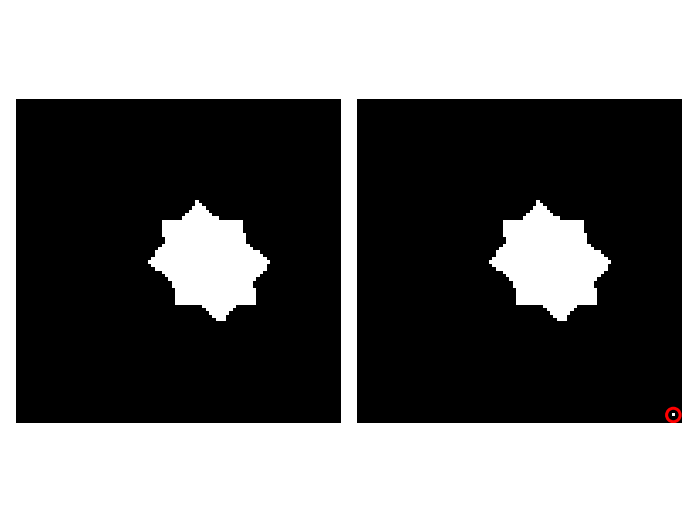

In [6]:
plt.figure(3)
plt.subplot(121)
plt.imshow(star_clean,cmap=cmap)
plt.axis('off')
plt.subplot(122)
plt.imshow(star_noisy,cmap=cmap)
plt.axis('off')
circle = plt.Circle(noise_coord, 2, color='r', lw = 2, fill=False)
plt.gcf().gca().add_artist(circle)
plt.tight_layout()
plt.show()